##Vanilla Autoencoder


In [ ]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
# Load MNIST Dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train/ 255
x_test = x_test / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 784)
(10000, 784)


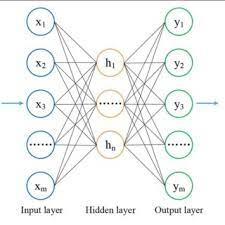




In [ ]:
# Hyper parameters
batch_size = 128
nb_epoch = 50

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 16  #increase the hidden nodes to 128 and see the result

# Build autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(16, activation='relu')(input_img)  #bottleneck
decoded = Dense(784,activation='sigmoid')(encoded) #change to relu
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  #change optimizer as adadelta,adamax and loss to mse see the result
autoencoder.summary()
# Train
autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
Total params: 12,560
Trainable params: 12,560
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train
autoencoder.fit(x_train, x_train, epochs=5, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 5s 5ms/step - loss: 0.2586 - val_loss: 0.1882
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1714 - val_loss: 0.1567
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1512 - val_loss: 0.1452
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1436 - val_loss: 0.1401
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1396 - val_loss: 0.1367


In [ ]:
# Evaluate
evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

79/79 [==============================] - 0s 3ms/step - loss: 0.1367

Summary: Loss over the test dataset: 0.14


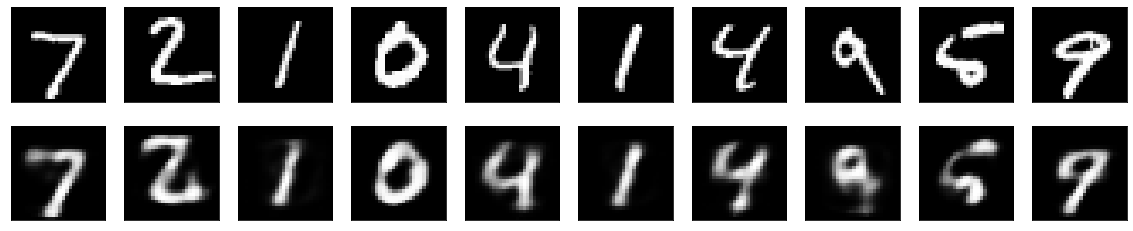

In [ ]:
# Decode test images
decoded_imgs = autoencoder.predict(x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Shape of Hidden Layer (784, 16)
Visualization of Hidden Layer


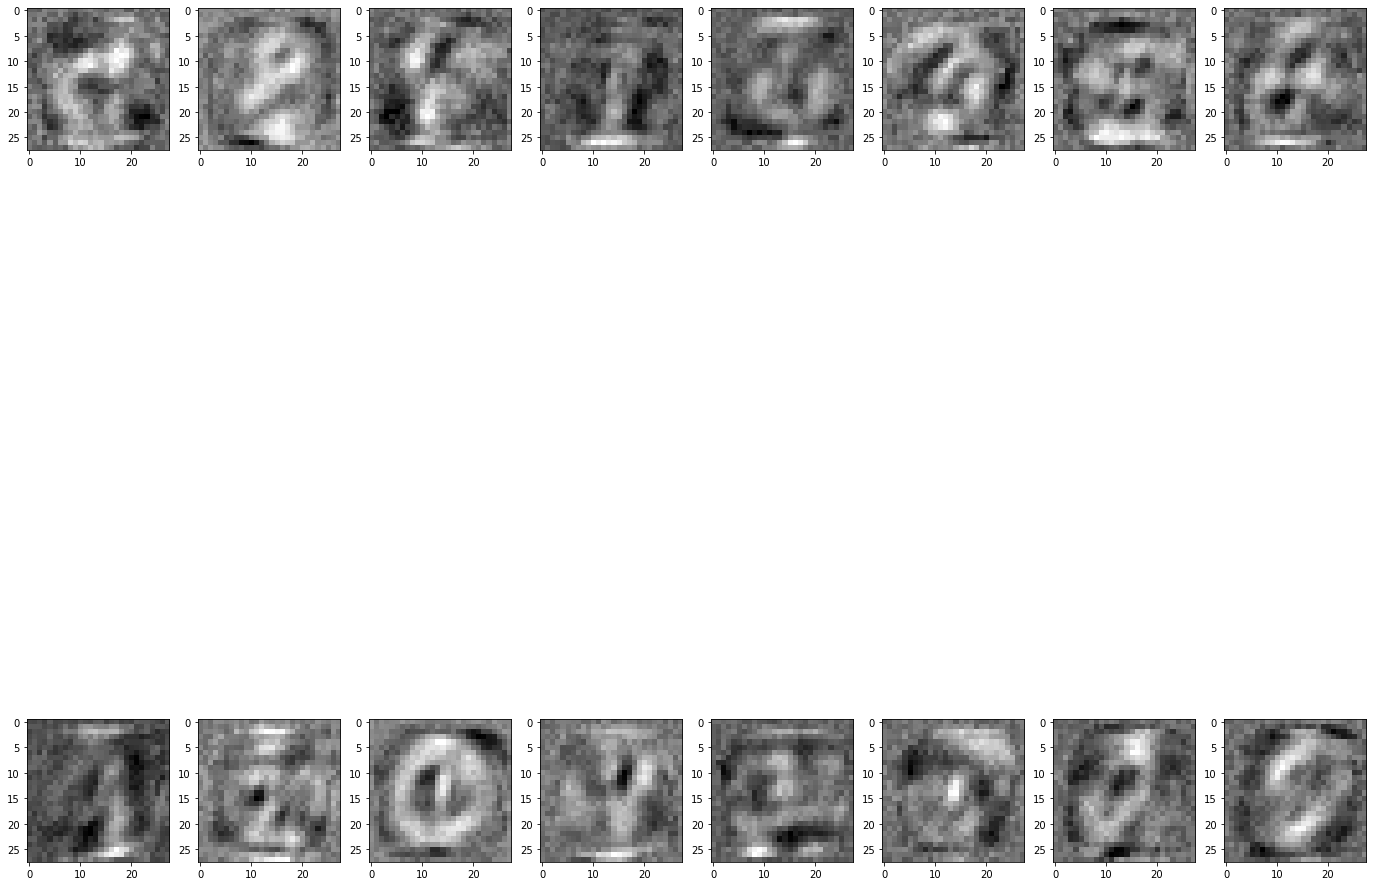

In [ ]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(24, 24))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

#Sparse autoencoder

In [ ]:
from keras import regularizers

# Hyper parameters
batch_size = 128
nb_epoch = 50

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 1024  #increase the hidden nodes to 128 and see the result
# Build autoencoder model

input_img = Input(shape=(784,))
encoded = Dense(16, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(x_train, x_train, epochs=5, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))
print("Training Finished!")
# Evaluate
evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        13,328 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,888 (101.12 KB)

 Trainable params: 25,888 (101.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.6551 - val_loss: 0.5538
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5282 - val_loss: 0.4641
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4472 - val_loss: 0.4054
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3943 - val_loss: 0.3659
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3581 - val_loss: 0.3388
Training Finished!
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3340

Summary: Loss over the test dataset: 0.34


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


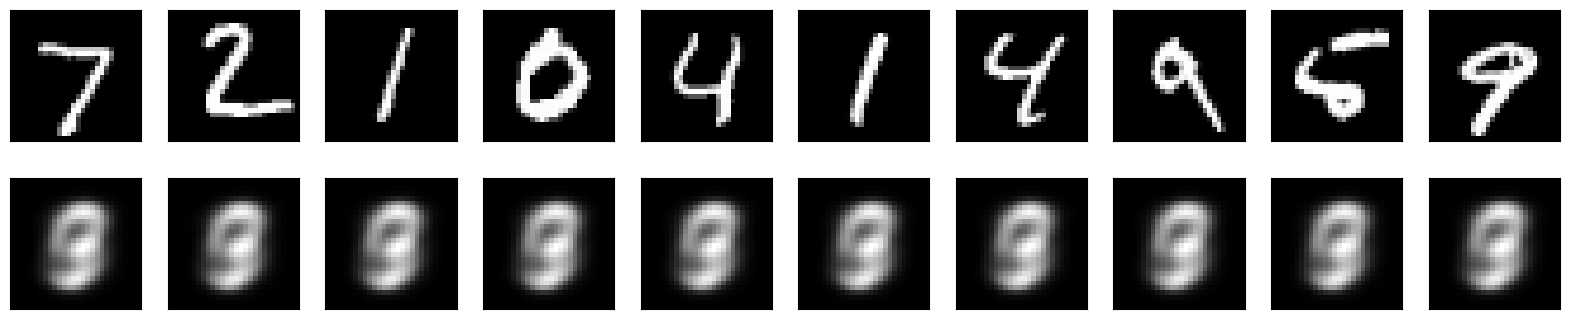

In [ ]:
# Decode test images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Shape of Hidden Layer (784, 1024)
Visualization of first 1024 nodes in the Hidden Layer


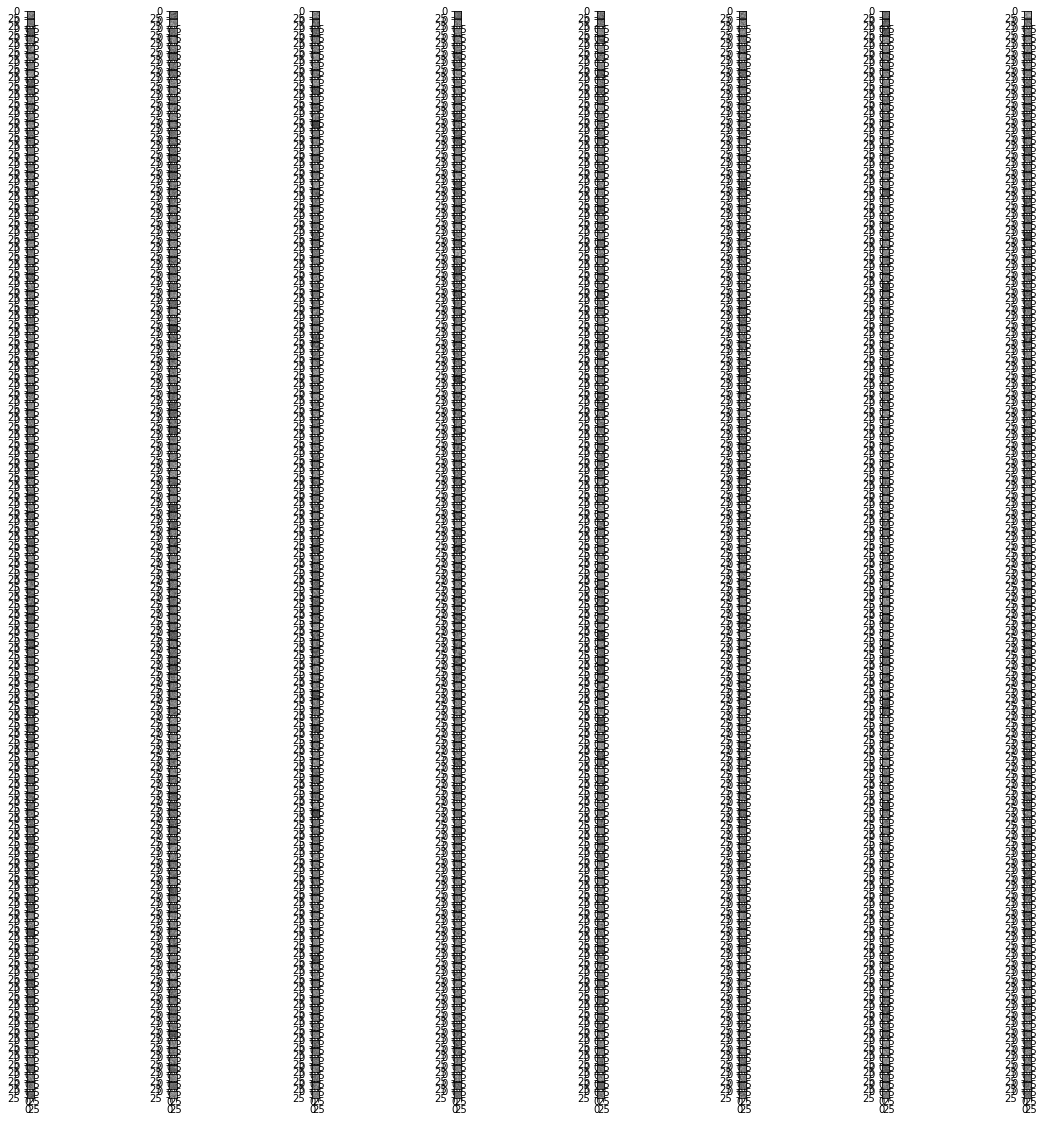

In [ ]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

nb_show = 1024
layer = np.array(w[1][0])
layer1 = layer[:,0:nb_show]
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of first",nb_show,"nodes in the Hidden Layer")
fig=plt.figure(figsize=(20, 20))
columns = 8
rows = int(nb_show/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

#Deep Autoencoders


In [ ]:
# Hyper parameters
batch_size = 128
nb_epoch = 50

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 128  #increase the hidden nodes to 128 and see the result
# Build autoencoder model
input_img = Input(shape=(784,))
x=Dense(392, activation='relu')(input_img)
x=Dense(196, activation='relu')(x)
x=Dense(16, activation='relu')(x) #Code layer
x=Dense(196, activation='relu')(x)
x=Dense(392, activation='relu')(x)
output=Dense(784, activation='sigmoid')(x)
autoencoder = Model(input_img, output)
autoencoder.compile(loss='mse', optimizer='Adam')
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 392)               307720    
                                                                 
 dense_5 (Dense)             (None, 196)               77028     
                                                                 
 dense_6 (Dense)             (None, 128)               25216     
                                                                 
 dense_7 (Dense)             (None, 196)               25284     
                                                                 
 dense_8 (Dense)             (None, 392)               77224     
                                                                 
 dense_9 (Dense)             (None, 784)               3081

In [ ]:
# Train
autoencoder.fit(x_train, x_train, epochs=5, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))
print("Training Finished!")

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.0322 - val_loss: 0.0141
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0118 - val_loss: 0.0094
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0088 - val_loss: 0.0079
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0074 - val_loss: 0.0065
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0064 - val_loss: 0.0061
Training Finished!


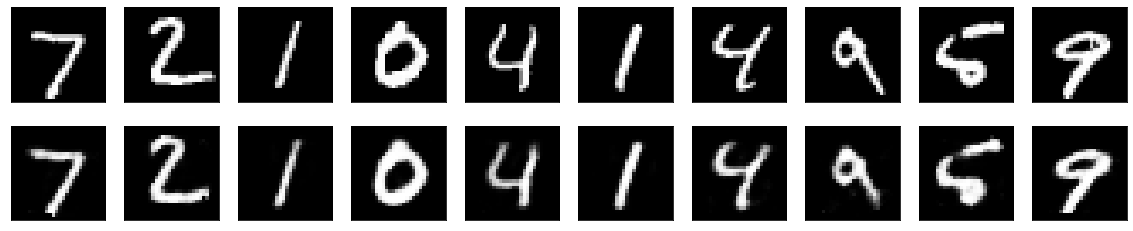

In [ ]:
# Decode test images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Denoising

In [ ]:
# Add random noise
corruption_level = 0.3
x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0,
                                                              size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


(60000, 784)
(10000, 784)


In [ ]:
# Hyper parameters
batch_size = 128
nb_epoch = 5

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 128 #change to 32,64

# Build autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(16, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.summary()
autoencoder.fit(x_train_noisy, x_train,
                epochs=20, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train
autoencoder.fit(x_train_noisy, x_train,
                epochs=20, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1824 - val_loss: 0.1213
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1106 - val_loss: 0.1011
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0981 - val_loss: 0.0940
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0930 - val_loss: 0.0909
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0904 - val_loss: 0.0891
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0886 - val_loss: 0.0877
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0875 - val_loss: 0.0868
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0865 - val_loss: 0.0860
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0858 - val_loss: 0.0855
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0852 - val_loss: 0.0850

In [ ]:
# Evaluate
evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

79/79 [==============================] - 0s 3ms/step - loss: 0.0833

Summary: Loss over the test dataset: 0.08


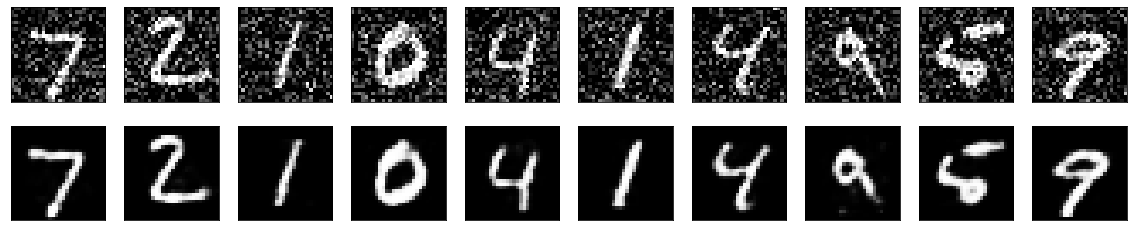

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Decode test images
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Shape of Hidden Layer (784, 32)
Visualization of Hidden Layer


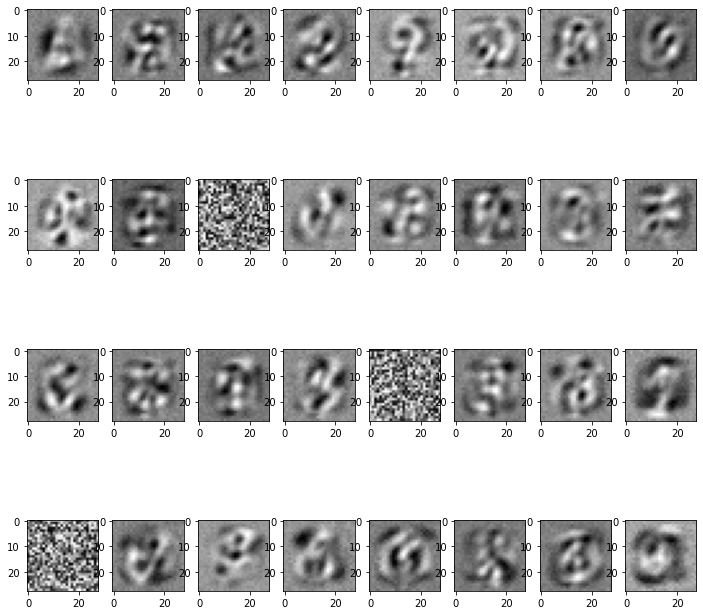

In [ ]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Lets corrupt the data too much and see what happpens

In [ ]:
# Add random noise
corruption_level = 0.7

x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0,
                                                              size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Hyper parameters
batch_size = 128
nb_epoch = 5

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 128

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(x_train_noisy, x_train,
                epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))

# Evaluate
evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2169 - val_loss: 0.1662
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1568 - val_loss: 0.1486
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1459 - val_loss: 0.1423
Epoch 4/5
469/469 [

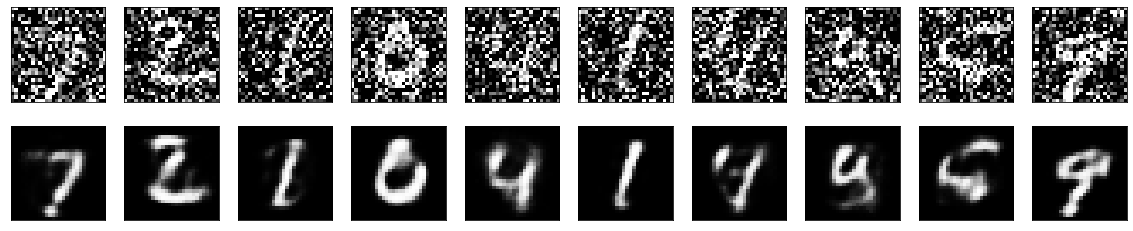

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Decode test images
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Shape of Hidden Layer (784, 128)
Visualization of Hidden Layer


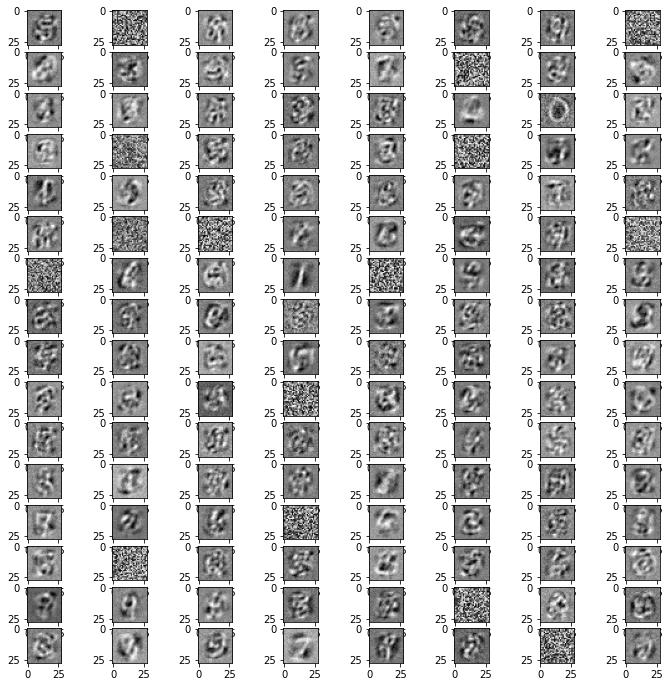

In [ ]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from sklearn.model_selection import train_test_split

# Parameters
image_size = (64, 64)
image_folder = #one category of images folder path

# Load and preprocess images
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = load_img(path, target_size=image_size)
        img_array = img_to_array(img) / 255.0  # Normalize
        images.append(img_array)
    return np.array(images)

images = load_images(image_folder)
print("Total images loaded:", len(images))

# Flatten images for fully connected autoencoder
X = images.reshape(len(images), -1)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Autoencoder architecture
input_dim = X.shape[1]  # 64x64x3 = 12288

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(X_train, X_train, epochs=250, batch_size=32, validation_data=(X_test, X_test))

# Predict some reconstructions
decoded_imgs = autoencoder.predict(X_test)

# Visualize results
n = 5
plt.figure(figsize=(12, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(64, 64, 3))
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64, 3))
    plt.title("Reconstructed")
    plt.axis("off")
plt.tight_layout()
plt.show()
